# 3 - Million Russian Troll Tweets
- James M Irving, Ph.D.
- Mod 4 Project
- Flatiron Full Time Data Science Bootcamp - 02/2019 Cohort

## GOAL: 

- *IF I can get a control dataset* of non-Troll tweets from same time period with similar hashtags:*
    - Use NLP to predict of a tweet is from an authentic user or a Russian troll.
- *If no control tweets to compare to*
    - Use NLP to predict how many retweets a Troll tweet will get.
    - Consider both raw # of retweets, as well as a normalized # of retweets/# of followers.
        - The latter would give better indication of language's effect on propagation. 
        

## Dataset Features:
- Kaggle Dataset published by FiveThirtyEight
    - https://www.kaggle.com/fivethirtyeight/russian-troll-tweets/downloads/russian-troll-tweets.zip/2
<br>    
- Data is split into 9 .csv files
    - 'IRAhandle_tweets_1.csv' to 9

- **Variables:**
    - ~~`external_author_id` | An author account ID from Twitter~~
    - `author` | The handle sending the tweet
    - `content` | The text of the tweet
    - `region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?   id=000199367&type=1)
    - `language` | The language of the tweet
    - `publish_date` | The date and time the tweet was sent
    - ~~`harvested_date` | The date and time the tweet was collected by Social Studio~~
    - `following` | The number of accounts the handle was following at the time of the tweet
    - `followers` | The number of followers the handle had at the time of the tweet
    - `updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
    - `post_type` | Indicates if the tweet was a retweet or a quote-tweet *[Whats a quote-tweet?]*
    - `account_type` | Specific account theme, as coded by Linvill and Warren
    - `retweet` | A binary indicator of whether or not the tweet is a retweet [?]
    - `account_category` | General account theme, as coded by Linvill and Warren
    - `new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
    
### **Classification of account_type**
Taken from: [rcmediafreedom.eu summary](https://www.rcmediafreedom.eu/Publications/Academic-sources/Troll-Factories-The-Internet-Research-Agency-and-State-Sponsored-Agenda-Building)

>- **They identified five categories of IRA-associated Twitter accounts, each with unique patterns of behaviors:**
    - **Right Troll**, spreading nativist and right-leaning populist messages. It supported the candidacy and Presidency of Donald Trump and denigrated the Democratic Party. It often sent divisive messages about mainstream and moderate Republicans.
    - **Left Troll**, sending socially liberal messages and discussing gender, sexual, religious, and -especially- racial identity. Many tweets seemed intentionally divisive, attacking mainstream Democratic politicians, particularly Hillary Clinton, while supporting Bernie Sanders prior to the election.
    - **News Feed**, overwhelmingly presenting themselves as U.S. local news aggregators, linking to legitimate regional news sources and tweeting about issues of local interest.
    - **Hashtag Gamer**, dedicated almost exclusively to playing hashtag games.
    - **Fearmonger**: spreading a hoax about poisoned turkeys near the 2015 Thanksgiving holiday.

>The different types of account were used differently and their efforts were conducted systematically, with different allocation when faced with different political circumstances or shifting goals. E.g.: there was a spike of activity by right and left troll accounts before the publication of John Podesta's emails by WikiLeaks. According to the authors, this activity can be characterised as “industrialized political warfare”.

___

In [5]:
import bs_ds as bs
from bs_ds.imports import *

In [6]:
import os
root_dir = 'russian-troll-tweets/'
# os.listdir('russian-troll-tweets/')
filelist = [os.path.join(root_dir,file) for file in os.listdir(root_dir) if file.endswith('.csv')]
filelist

['russian-troll-tweets/IRAhandle_tweets_1.csv',
 'russian-troll-tweets/IRAhandle_tweets_2.csv',
 'russian-troll-tweets/IRAhandle_tweets_3.csv',
 'russian-troll-tweets/IRAhandle_tweets_4.csv',
 'russian-troll-tweets/IRAhandle_tweets_5.csv',
 'russian-troll-tweets/IRAhandle_tweets_6.csv',
 'russian-troll-tweets/IRAhandle_tweets_7.csv',
 'russian-troll-tweets/IRAhandle_tweets_8.csv',
 'russian-troll-tweets/IRAhandle_tweets_9.csv']

In [12]:
# Previewing dataset
df = pd.read_csv(filelist[0])
df.head(3)

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll


## Merging full dataset

In [13]:
# Vertically concatenate 
for file in filelist:
    df_new = pd.read_csv(file)
    df = pd.concat([df,df_new], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354387 entries, 0 to 37554
Data columns (total 15 columns):
external_author_id    float64
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following             int64
followers             int64
updates               int64
post_type             object
account_type          object
new_june_2018         int64
retweet               int64
account_category      object
dtypes: float64(1), int64(5), object(9)
memory usage: 409.5+ MB


In [17]:
df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


# SCRUBBING/EDA

In [14]:
from pandas_profiling import ProfileReport
ProfileReport(df)

Number of variables,16
Number of observations,3354387
Total Missing (%),3.5%
Total size in memory,409.5 MiB
Average record size in memory,128.0 B
Numeric,5
Categorical,9
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3354387 entries, 0 to 37554
Data columns (total 15 columns):
external_author_id    float64
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following             int64
followers             int64
updates               int64
post_type             object
account_type          object
new_june_2018         int64
retweet               int64
account_category      object
dtypes: float64(1), int64(5), object(9)
memory usage: 409.5+ MB


## Observations from Inspection / Pandas_Profiling ProfileReport

- **Language to Analyze is in `Content`:**
    - Actual tweet contents. 
 
- **Classification/Analysis Thoughts:**
    - **Variables should be considered in 2 ways:**
        - First, the tweet contents. 
            - Use NLP to engineer features to feed into deep learning.
                - Sentiment analysis, named-entity frequency/types, most-similar words. 
        - Second, the tweet metadata. 
        
### Thoughts on specific features:
- `language`
    - There are 56 unique languages. 
    - 2.4 million are English, 670 K are in Russian, etc.
    - Note: for metadata, analyzing if an account posts in more than 1 language may be a good predictor. 
- `followers`/`following`
    - **following** could be informative if goal is to predict if its a troll tweet.
    - **followers** should be used (with retweets) if predicting retweets based on content. 

- **Questions:**
    - [ ] Why are so many post_types missing? (55%?)
    
### Scrubing to Perform
- **Recast Columns:**
    - [ ] `publish_date` to datetime. 
- **Columns to Discard:**
    - [ ] `external_author_id` ( we have author handle)
    - [ ] `harvested_date` (we care about publish_date, if anything, time-wise)
    - [ ] `language`: remove all non-english tweets and drop column
    - [ ] `new_june_2018`

In [21]:
# Drop non-english rows
df = df.loc[df.language=='English']
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420534 entries, 0 to 37431
Data columns (total 15 columns):
external_author_id    float64
author                object
content               object
region                object
language              object
publish_date          object
harvested_date        object
following             int64
followers             int64
updates               int64
post_type             object
account_type          object
new_june_2018         int64
retweet               int64
account_category      object
dtypes: float64(1), int64(5), object(9)
memory usage: 295.5+ MB


In [22]:
cols_to_drop = ['external_author_id','harvested_date','new_june_2018']#: remove all non-english tweets and drop column

for col in cols_to_drop:
    df.drop(col, axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420534 entries, 0 to 37431
Data columns (total 12 columns):
author              object
content             object
region              object
language            object
publish_date        object
following           int64
followers           int64
updates             int64
post_type           object
account_type        object
retweet             int64
account_category    object
dtypes: int64(4), object(8)
memory usage: 240.1+ MB


### Recasting Publish date as datetime column (date_published)

In [6]:
# Convert publish_date to datetime
df['date_published'] = pd.to_datetime(df.publish_date)
print(np.max(df.date_published), np.min(df.date_published))

2018-05-30 20:58:00 2012-02-06 20:24:00


In [8]:
df.set_index('date_published',inplace=True)

In [9]:
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category
date_published,,,,,,,,,,,,
2017-10-01 19:58:00,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll
2017-10-01 22:43:00,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll
2017-10-01 22:50:00,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,1,RightTroll
2017-10-01 23:52:00,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll
2017-10-01 02:13:00,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll


# Save/Load and Resume

In [10]:
# Save csv
df.to_csv('russian_troll_tweets_eng_only_date_pub_index.csv')

In [1]:
import bs_ds as bs
from bs_ds.imports import *
# Load csv
df = pd.read_csv('russian_troll_tweets_eng_only_date_pub_index.csv', index_col=0)
df.dropna(subset=['content'],inplace=True) # Dropping the 1 null value 

View our documentation at https://bs-ds.readthedocs.io/en/latest/index.html
For convenient loading of standard modules :
>> from bs_ds.imports import *



,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


To disable styled DataFrames run html_off() at the bottom of any cell.
 To re-enable use html_on() at the bottom of any cell.


C:\Users\james\Anaconda3\envs\learn-env-ext\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2420533 entries, 0 to 37431
Data columns (total 12 columns):
author              object
content             object
region              object
language            object
publish_date        object
following           int64
followers           int64
updates             int64
post_type           object
account_type        object
retweet             int64
account_category    object
dtypes: int64(4), object(8)
memory usage: 240.1+ MB


In [4]:
df.head()

,author,content,region,language,publish_date,following,followers,updates,post_type,account_type,retweet,account_category
0,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,1052,9636,253,NaN,Right,0,RightTroll
1,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll
2,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,1054,9637,255,RETWEET,Right,1,RightTroll
3,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll
4,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll


### Determining Hashtags

- Use regular expressions to extract the hashtags #words and @handles.
- Use the top X many tags as search terms for twitter API
    - There are 1,678,170 unique hashtags and 1,165,744 unique @'s
    - 

In [190]:
# Need to get a list of hash tags.
text_to_search_list = []

for i in range(len(df)):    
    tweet_contents =df['content'].iloc[i]
    text_to_search_list.append(tweet_contents)
#     text_to_search_list.append([i,tweet_contents])
    
text_to_search_list[:3]

['"We have a sitting Democrat US Senator on trial for corruption and you\'ve barely heard a peep from the mainstream media." ~ @nedryun https://t.co/gh6g0D1oiC',
 'Marshawn Lynch arrives to game in anti-Trump shirt. Judging by his sagging pants the shirt should say Lynch vs. belt https://t.co/mLH1i30LZZ',
 'Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear.  #BoycottNFL https://t.co/qDlFBGMeag',
 'JUST IN: President Trump dedicates Presidents Cup golf tournament trophy to the people of Florida, Texas and Puerto Rico. https://t.co/z9wVa4djAE',
 '19,000 RESPECTING our National Anthem! #StandForOurAnthem🇺🇸 https://t.co/czutyGaMQV',
 'Dan Bongino: "Nobody trolls liberals better than Donald Trump." Exactly!  https://t.co/AigV93aC8J',
 '🐝🐝🐝 https://t.co/MorL3AQW0z',
 "'@SenatorMenendez @CarmenYulinCruz Doesn't matter that CNN doesn't report on your crimes. This won't change the fact that you're going down.'",
 'As much as I hate promoti

In [ ]:
# df_num_content = pd.DataFrame(text_to_search_list)
# df_num_content.columns=['df_index','df.content']
# df_num_content.head()

In [187]:
# len(df_num_content)==len(df) #.groupby('df_index').count()

In [191]:
def get_tags_ats(text_to_search,exp_tag = r'(#\w*)',exp_at = r'(@\w*)',output='series',show_counts=False):
    """Accepts a list of text entries to search, and a regex for tags, and a regex for @'s.
    Joins all entries in the list of text and then re.findsall() for both expressions.
    Returns a series of found_tags and a series of found_ats.'"""
    import re
    
    # Create a single long joined-list of strings
    text_to_search_combined = ' '.join(text_to_search)
        
    # print(len(text_to_search_combined), len(text_to_search_list))
    found_tags = re.findall(exp_tag, text_to_search_combined)
    found_ats = re.findall(exp_at, text_to_search_combined)
    
    if output.lower() == 'series':
        found_tags = pd.Series(found_tags, name='tags')
        found_ats = pd.Series(found_ats, name='ats')
        
        if show_counts==True:
            print(f'\t{found_tags.name}:\n{tweet_tags.value_counts()} \n\n\t{found_ats.name}:\n{tweet_ats.value_counts()}')
                
    if (output.lower() != 'series') & (show_counts==True):
        raise Exception('output must be set to "series" in order to show_counts')
                       
    return found_tags, found_ats

In [197]:
# Get all tweet tags and @'s from text_to_search_list
tweet_tags, tweet_ats = get_tags_ats(text_to_search_list, show_counts=False)

print(f"There were {len(tweet_tags)} unique hashtags and {len(tweet_ats)} unique @'s\n")

# Create a dataframe with top_tags
df_top_tags = pd.DataFrame(tweet_tags.value_counts()[:40])#,'\n')
df_top_tags['% Total'] = (top_tags['tags']/len(tweet_tags)*100)

# Create a dataframe with top_ats
df_top_ats = pd.DataFrame(tweet_ats.value_counts()[:40])
df_top_ats['% Total'] = (top_ats['ats']/len(tweet_ats)*100)

# Display top tags and ats
bs.display_side_by_side(df_top_tags,df_top_ats)

There were 1678170 unique hashtags and 1165744 unique @'s



,tags,% Total
#news,130268,7.762503
#sports,53526,3.189546
#politics,43823,2.611356
#world,27676,1.649177
#local,26371,1.571414
#MAGA,19187,1.143329
#BlackLivesMatter,15517,0.924638
#TopNews,15269,0.909860
#tcot,12734,0.758803
#PJNET,12206,0.727340


# Thoughts on My Search Strategy

**My Twitter API Link:**<br>
https://api.twitter.com/1.1/tweets/search/fullarchive/search.json


**Inspect Data to get search parameters:**
- [X] Get the date range for the English tweets in the original dataset<br>
    `(Timestamp('2018-05-30 20:58:00'), Timestamp('2012-02-06 20:24:00'))`
- [X] Get a list of the hash tags (and their frequencies from the dataframe

**Determine most feasible and balanced well of extracting control tweets**
- **How many of each tag / @'s should I try to exctract?**
- **what are the limitations of the API that will be a road block to getting as many tweets as desired?**

- [ ] 

## Notes on Top Tags and Ats:


- The most common tags include some very generic categories that may not be helpful in extracting control tweets.
    - ~~Exclude: '#news','#sports','#politics','#world','#local','#TopNews','#health','#business','#tech',~~
    - On second thought, this is entirely appropriate, since these tags would be what appears in the wild.
    - Additionally, using a larger number of them (like 30, starts to provide more targeted hashtags.<br><br>
  
- The most common @'s are much more revealing and helpful in narrowing the focus of the results.

In [199]:
# Choose list of top tags to use in search
list_top_30_tags = df_top_tags.index[:30]
list_top_30_tags

Index(['#news', '#sports', '#politics', '#world', '#local', '#MAGA',
       '#BlackLivesMatter', '#TopNews', '#tcot', '#PJNET', '#health',
       '#business', '#tech', '#entertainment', '#top', '#Cleveland', '#crime',
       '#TopVideo', '#Trump', '#NowPlaying', '#amb', '#environment', '#ISIS',
       '#breaking', '#mar', '#WakeUpAmerica', '#Miami', '#2A', '#GOPDebate',
       '#topl'],
      dtype='object')

In [200]:
# Choose list of top tags to use in search
list_top_30_ats = df_top_ats.index[:30]
list_top_30_ats

Index(['@realDonaldTrump', '@midnight', '@POTUS', '@HillaryClinton',
       '@YouTube', '@', '@CNN', '@FoxNews', '@TalibKweli', '@WarfareWW',
       '@GiselleEvns', '@WorldOfHashtags', '@deray', '@nytimes', '@josephjett',
       '@CNNPolitics', '@GOP', '@seanhannity', '@BreitbartNews',
       '@BarackObama', '@HashtagRoundup', '@tedcruz', '@washingtonpost',
       '@docrocktex26', '@ShaunKing', '@BernieSanders', '@VanJones68',
       '@mashable', '@Jenn_Abrams', '@SpeakerRyan'],
      dtype='object')

In [201]:
# # Define a new function that will be used with .apply()
# # that will search for a string and return all other tags/ats if the content contains the target pattern
# def find_grouped_tags(cell, tag):
#     import re
#     if tag in cell:
#         found_tags = []
#         found_tags, _ = get_tags_ats(cell, output='list')
#         return found_tags
#     else:
#         return np.nan

## Using the Twitter Search API to Extract Control Tweets

- Required API key are saved in the Main folder in which this repo is saved. 
- Check the [Premium account docs for search syntax](https://developer.twitter.com/en/docs/tweets/search/overview/premium#ProductPackages)

**LINK TO PREMIUM SEARCH API GUIDE**
https://developer.twitter.com/en/docs/tweets/search/api-reference/premium-search

### Fundamental API characteristics

- Supports both GET and POST requests formats:
    - GET request parameters are URL encoded.
    - POST request parameters are JSON encoded and sent as a data body.

### Available operators
- Premium search API supports rules with up to 1,024 characters. The Search Tweets APIs support the premium operators listed below. See our Premium operators guide for more details.

**Matching on Tweet contents:**
- keyword
- "quoted phrase"
- #
- @
- url:
- lang:
 

- The base URI for the premium search API is https://api.twitter.com/1.1/tweets/search/.

- Premium search provides both data and counts endpoints. Note that the counts endpoint is not available in Sandbox dev environments.

**Method**
- POST /search/:product/:label	
    - Retrieve Tweets matching the specified query.
- POST /search/:product/:label/counts	
    - Retrieve the number of Tweets matching the specified query.
- Where:
    - `:product` indicates the search endpoint you are making requests to, either 30day or fullarchive.
    - `:label` is the (case-sensitive) label associated with your search developer environment, as displayed at https://developer.twitter.com/en/account/environments.
- For example, if using the 30-day endpoint and your dev environment has a label of 'dev' (short for development), the search URLs would be:
    - Data endpoint providing Tweets: https://api.twitter.com/1.1/tweets/search/30day/dev.json
    - Counts endpoint providing counts of Tweets: https://api.twitter.com/1.1/tweets/search/30day/dev/counts.json


### Using tweepy to access twitter API

- [Helpful tutorial on _most efficient_ way to access twitter API](https://bhaskarvk.github.io/2015/01/how-to-use-twitters-search-rest-api-most-effectively./)

In [6]:
import tweepy, sys

api_key =  'lCCNHRYrcOCRKyyjF3JIL43oj'
api_secret_key  = '3PDBkInZeBCygFG3phIIPtnfzrsfIUbWfDfhGgj90mgU6EOmLX'

auth = tweepy.AppAuthHandler(api_key, api_secret_key)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

if (not api):
    print("Can't authenticate.")
    sys.exit(-1)
# auth = tweepy.OAuthHandler(consumer_token, consumer_secret)

In [7]:
import sys, jsonpickle, os

searchQuery = ' '

___

In [18]:
df['pub_date'] = pub_date
df.set_index('pub_date',inplace=True)#,axis=1)

In [20]:
df.index

DatetimeIndex(['2017-10-01 19:58:00', '2017-10-01 22:43:00',
               '2017-10-01 22:50:00', '2017-10-01 23:52:00',
               '2017-10-01 02:13:00', '2017-10-01 02:47:00',
               '2017-10-01 02:48:00', '2017-10-01 02:52:00',
               '2017-10-01 03:47:00', '2017-10-01 03:51:00',
               ...
               '2015-09-14 08:07:00', '2015-09-19 08:23:00',
               '2015-09-19 08:23:00', '2015-09-19 08:23:00',
               '2015-10-07 06:27:00', '2015-10-08 15:01:00',
               '2015-11-04 08:24:00', '2016-06-25 11:27:00',
               '2015-07-31 18:35:00', '2015-08-13 11:19:00'],
              dtype='datetime64[ns]', name='pub_date', length=2420534, freq=None)

TypeError: Empty 'DataFrame': no numeric data to plot

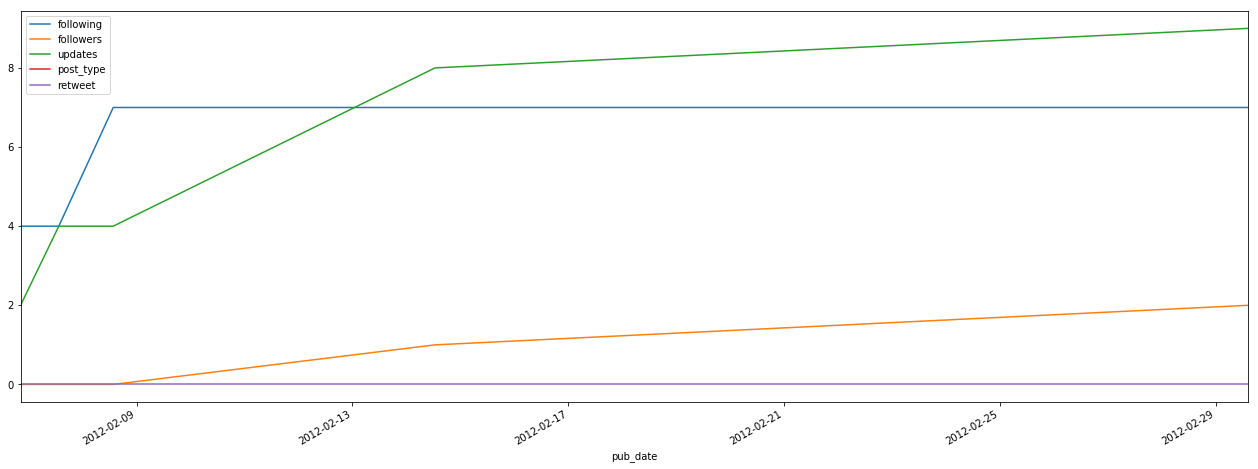

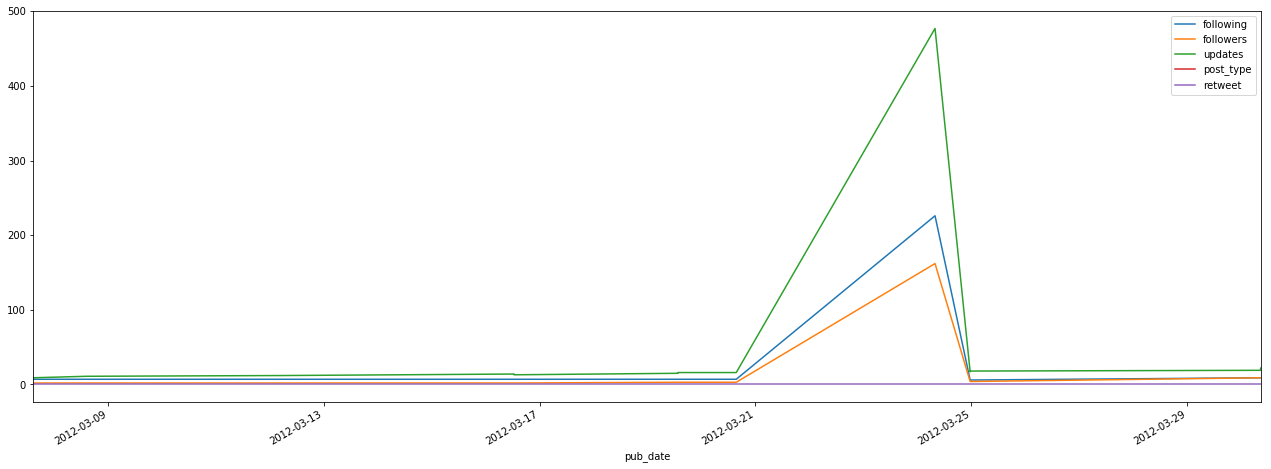

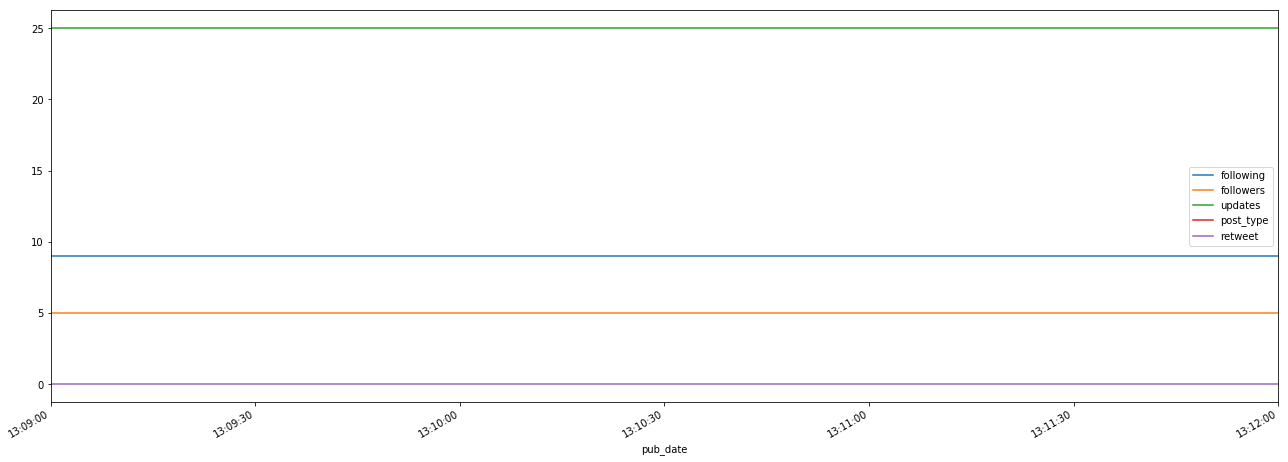

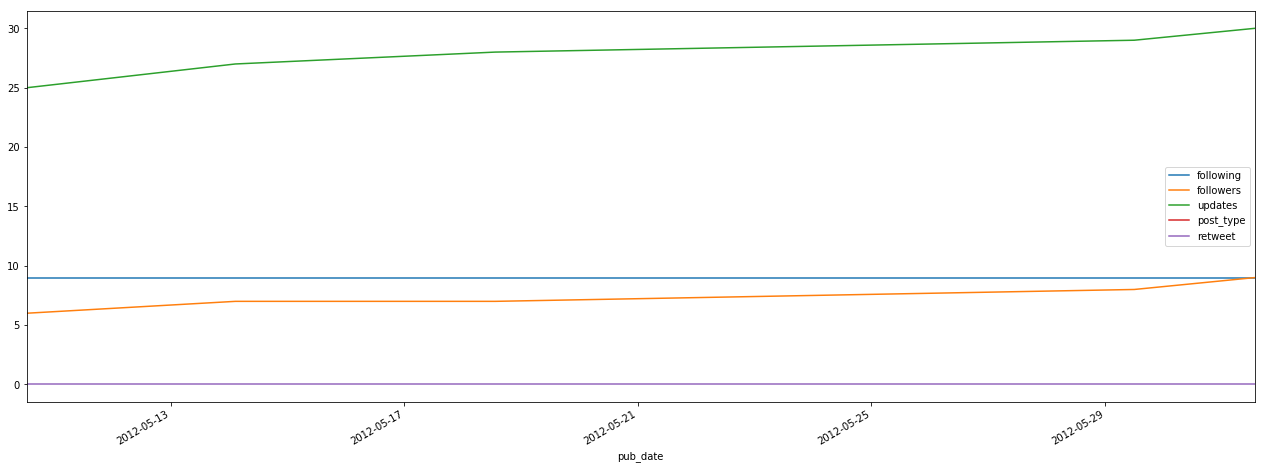

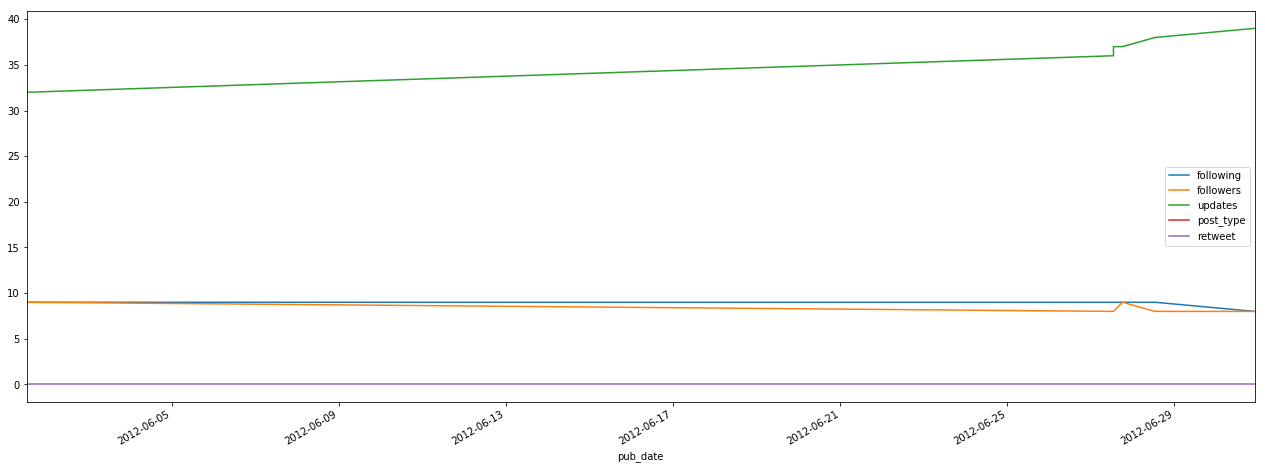

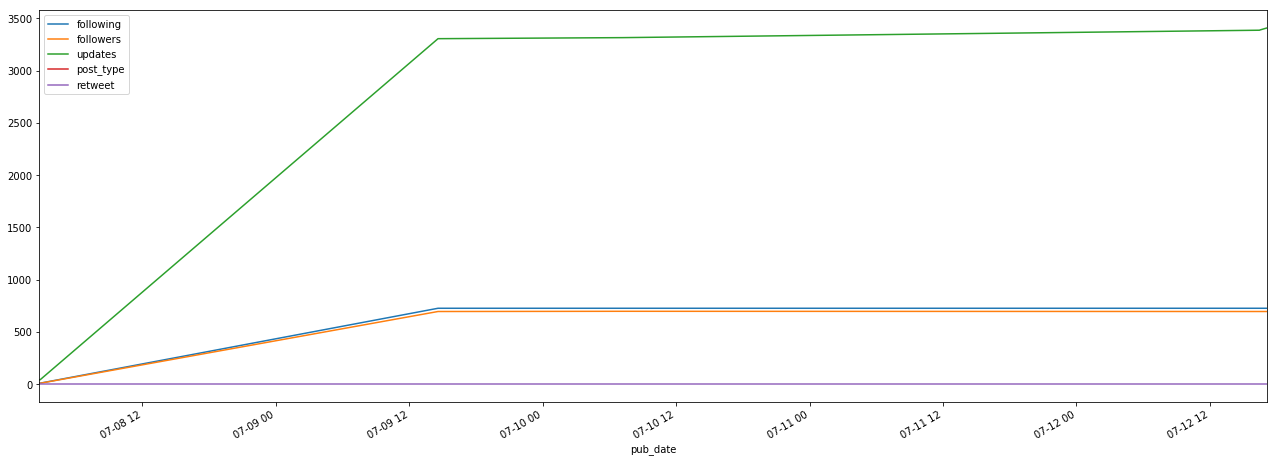

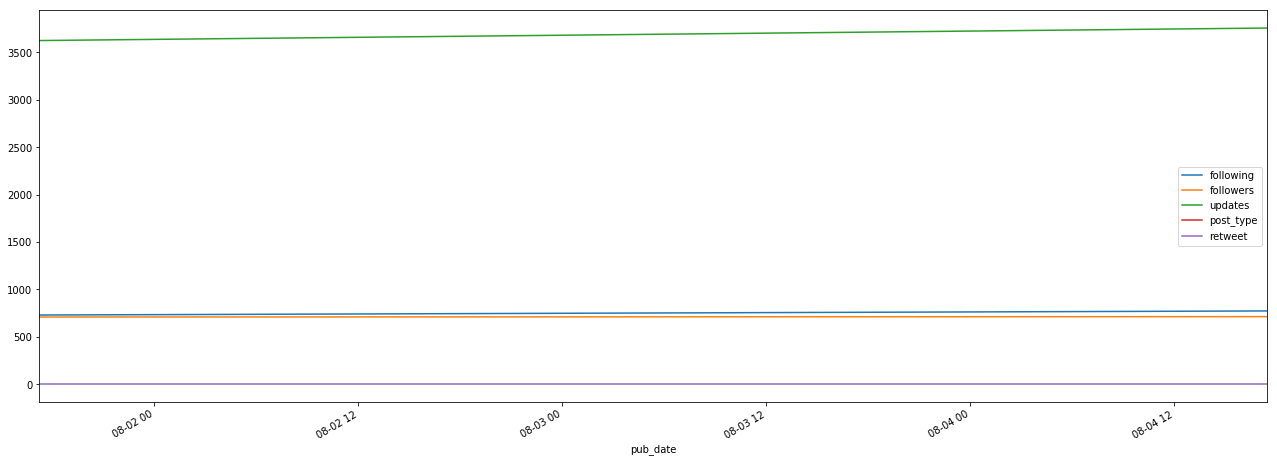

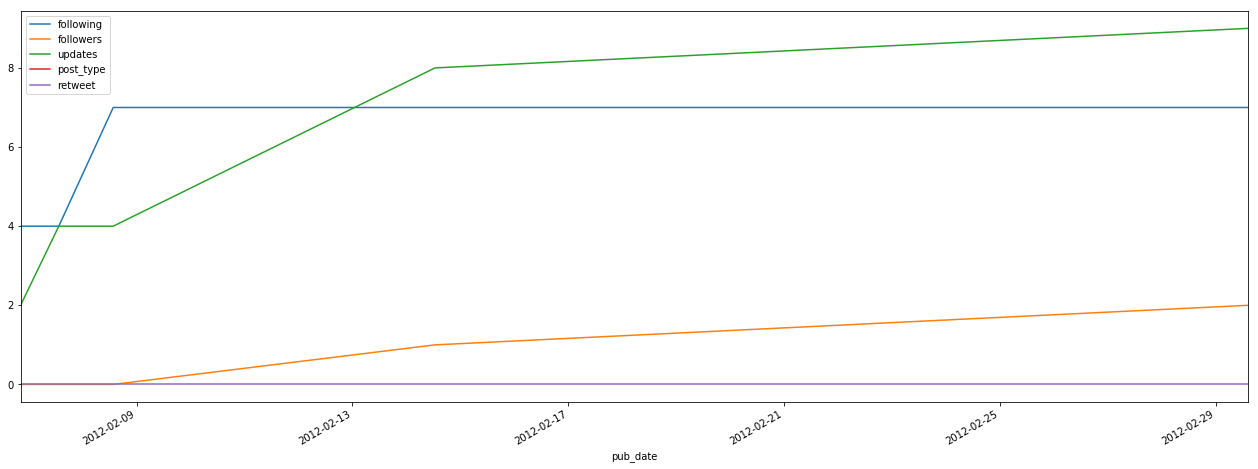

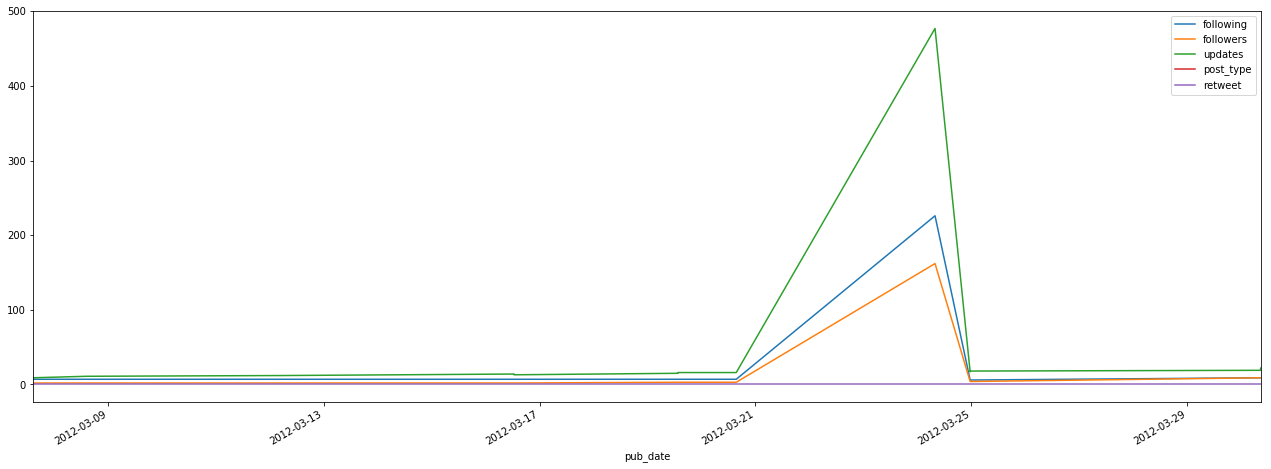

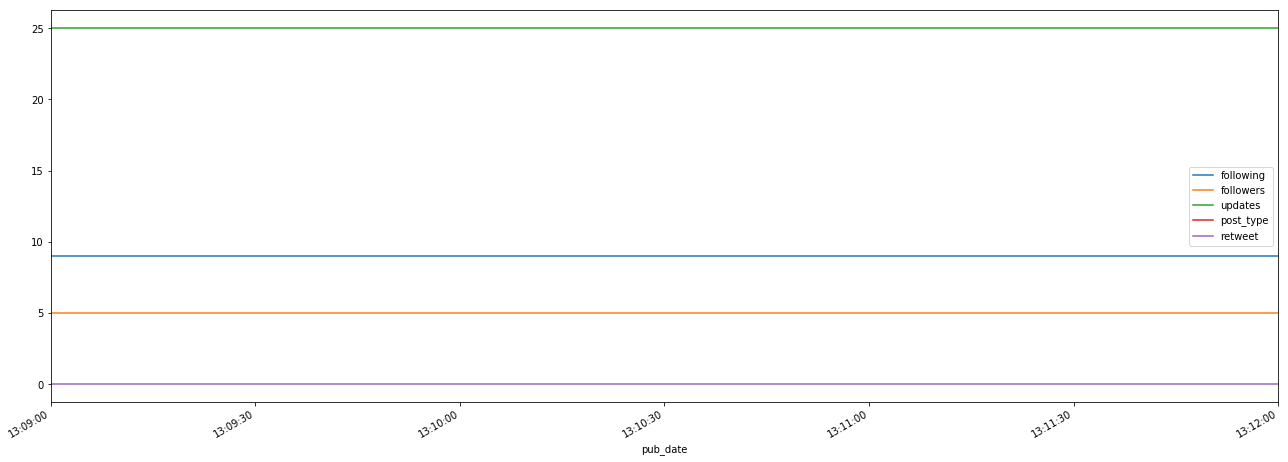

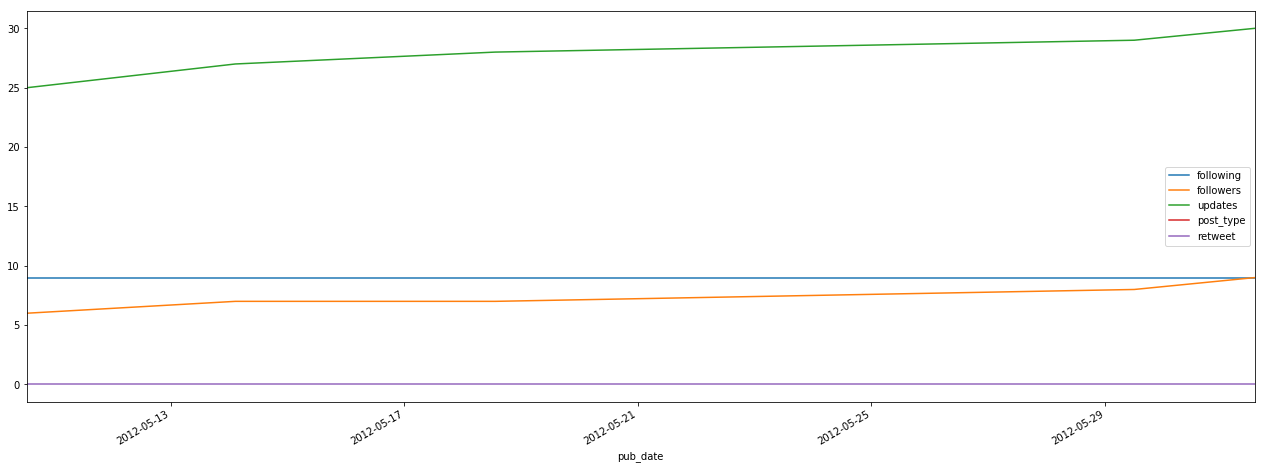

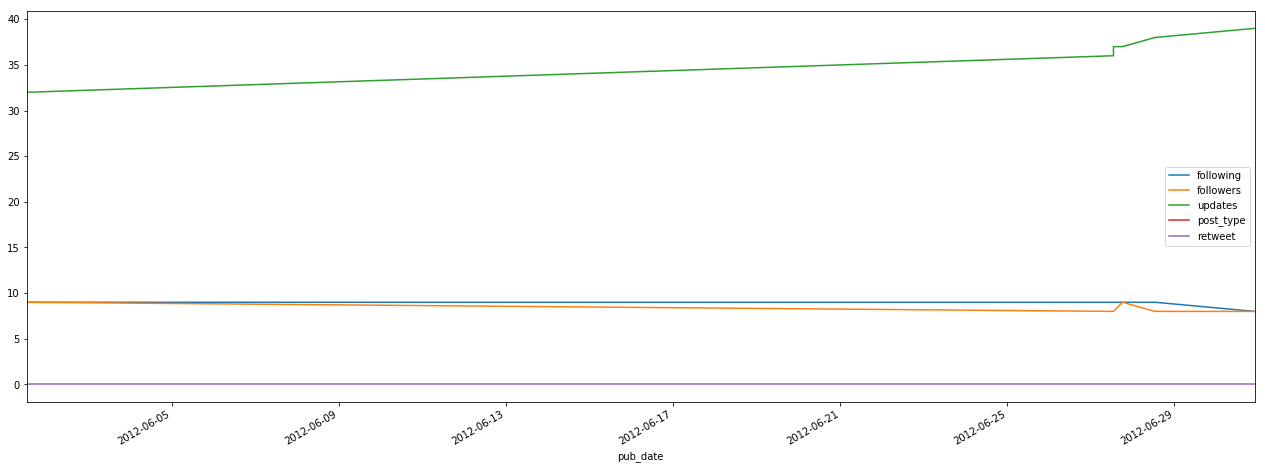

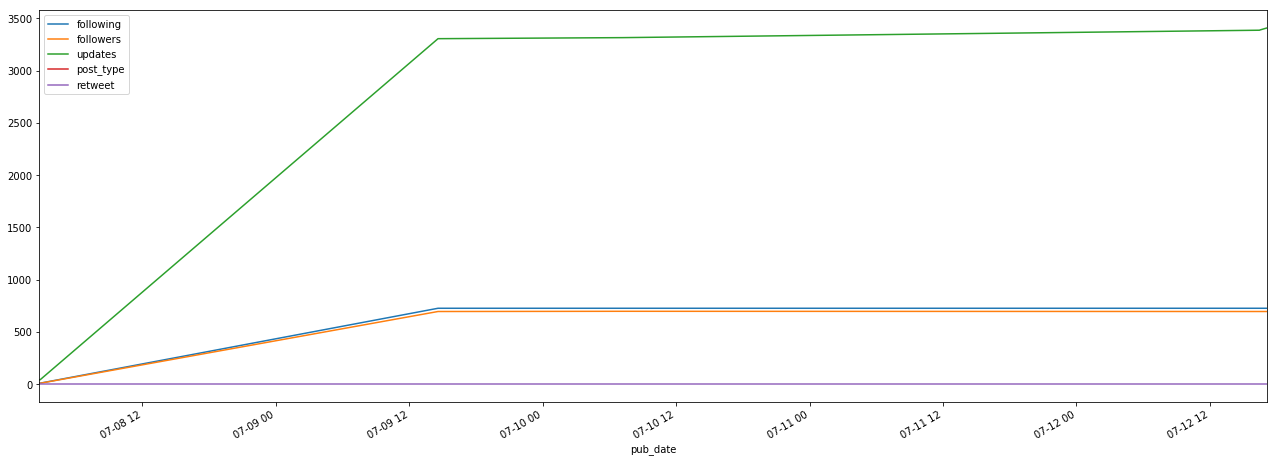

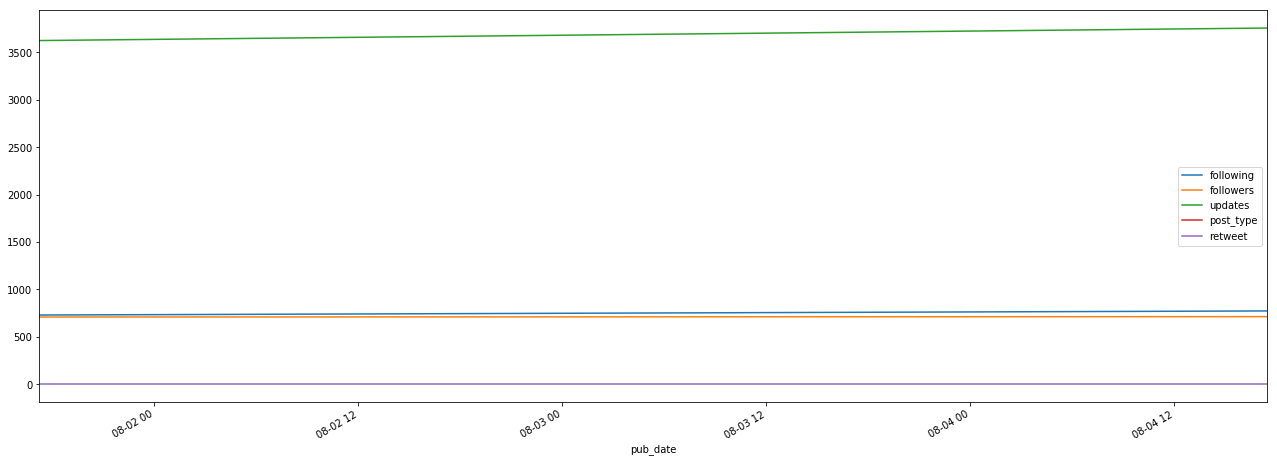

In [26]:
day_groups = df.groupby(pd.Grouper(freq='M'))
day_groups.plot(figsize=(22,8))#,style='b.')